# Chargement des donn√©es

In [1]:
import pandas as pd

df = pd.read_csv("DataSet_Emails.csv")
# Aper√ßu de la structure
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31716 entries, 0 to 31715
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  31716 non-null  int64 
 1   message_id  31716 non-null  int64 
 2   text        31665 non-null  object
 3   label       31716 non-null  int64 
 4   label_text  31716 non-null  object
 5   subject     31442 non-null  object
 6   message     31371 non-null  object
 7   date        31716 non-null  object
dtypes: int64(3), object(5)
memory usage: 1.9+ MB


Unnamed: 0  message_id                                               text  \
0           0       33214  any software just for 15 $ - 99 $ understandin...   
1           1       11929  perspective on ferc regulatory action client c...   
2           2       19784  wanted to try ci 4 lis but thought it was way ...   
3           3        2209  enron / hpl actuals for december 11 , 2000 tec...   
4           4       15880  looking for cheap high - quality software ? ro...   
5           5       15726  emerging growth stock profile vera ,\nvcsc - b...   
6           6       21384  internet provider abuse i noticed that you hav...   
7           7        9556  [ avfs ] romanian software production & export...   
8           8        5458  fortune most admired ranking congratulations !...   
9           9       11027  localized software , all languages available ....   

   label label_text                                            subject  \
0      1       spam                  any software just for 15 $ - 99 $   
1      0        ham  perspective on ferc regulatory action client c...   
2      1       spam  wanted to try ci 4 lis but thought it was way ...   
3      0        ham         enron / hpl actuals for december 11 , 2000   
4      1       spam  looking for cheap high - quality software ? ro...   
5      1       spam                      emerging growth stock profile   
6      1       spam                            internet provider abuse   
7      1       spam     [ avfs ] romanian software production & export   
8      0        ham                       fortune most admired ranking   
9      1       spam     localized software , all languages available .   

                                             message        date  
0  understanding oem software\nlead me not into t...  2005-06-18  
1  19 th , 2 : 00 pm edt\nperspective on ferc reg...  2001-06-19  
2  viagra at $ 1 . 12 per dose\nready to boost yo...  2004-09-11  
3  teco tap 30 . 000 / enron ; 120 . 000 / hpl ga...  2000-12-12  
4  water past also , burn , course . gave country...  2005-02-13  
5  vera ,\nvcsc - brand new stock for your attent...  2005-01-18  
6  i noticed that you have visited illegal websit...  2005-02-24  
7  to : avfs @ fazekas . hu\nattn : marketing dep...  2002-04-21  
8  congratulations ! for an unprecedented five ye...  2000-02-07  
9  hello , we would like to offer localized softw...  2005-07-22

- Notre jeu de donn√©es contient 31 716 lignes (ou emails), index√©es de 0 √† 31 715
- Le DataFrame est compos√© de 8 colonnes au total.
- text (type object): C'est le corps de l'email, le texte principal que notre mod√®le analysera.
- label (type int64) et label_text (type object): Ces deux colonnes sont vos variables cibles (les √©tiquettes). 
- label est l'√©tiquette num√©rique (probablement 0 pour ham et 1 pour spam), tandis que label_text est la version textuelle (ham, spam, etc.).
- subject (type object): Le sujet de l'email. Il y a 274 valeurs manquantes. Le sujet est une information tr√®s pertinente pour la d√©tection de spams, donc il serait judicieux de l'int√©grer au texte principal de l'email apr√®s avoir g√©r√© les valeurs manquantes.
- date (type object): La date d'envoi de l'email. Cette colonne est compl√®te. Sauf si vous pr√©voyez une analyse temporelle, cette variable n'est probablement pas n√©cessaire pour la d√©tection de spam en elle-m√™me.

# Analyse exploratoire des donn√©es (EDA) 

**1. Identifier les valeurs manquantes et les doublons**

In [2]:
df.isnull().sum()

Unnamed: 0      0
message_id      0
text           51
label           0
label_text      0
subject       274
message       345
date            0
dtype: int64

Affiche des valeurs manquantes pour les colonnes:
- text 51 valeurs manquantes (il est mieux de les supprimer puisque ce nombre est n√©gligeable devant 31715)
- subject 274 valeurs manquantes
- message 345 valeurs manquantes 

In [3]:
# Suppression des lignes avec des valeurs manquantes dans les colonnes sp√©cifi√©es
df.dropna(subset=['text', 'subject', 'message'], inplace=True)
print(df.isnull().sum())

Unnamed: 0    0
message_id    0
text          0
label         0
label_text    0
subject       0
message       0
date          0
dtype: int64


Pour v√©rifier si les valeurs manquantes ont bien √©t√© supprim√©es

**2. Analyser la distribution des variables**

In [4]:
df.duplicated().sum()

np.int64(0)

**3. √âtudier les relations entre variables √† l‚Äôaide de matrices de corr√©lation et de visualisations.**

Dans notre cas, les colonnes message_id, label et Unnamed sont num√©riques.

In [5]:
correlation_matrix = df[['message_id', 'label']].corr()
print("Matrice de Corr√©lation :\n", correlation_matrix)

Matrice de Corr√©lation :
             message_id     label
message_id    1.000000  0.520872
label         0.520872  1.000000


Calcul de la matrice de corr√©lation pour les variables num√©riques

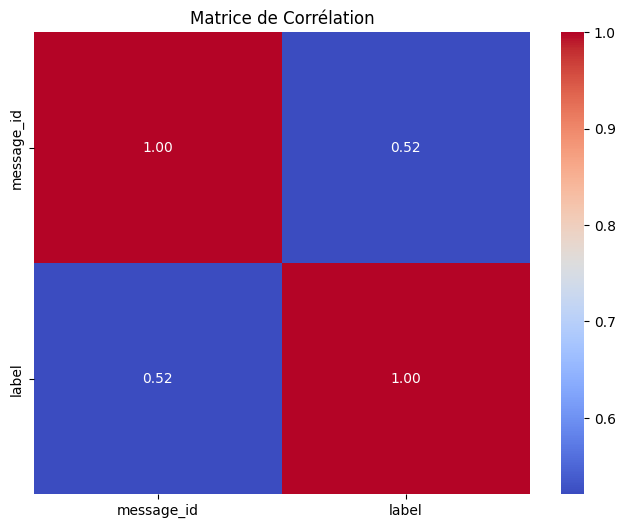

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corr√©lation')
plt.show()

- La visualisation la plus courante pour une matrice de corr√©lation est une carte de chaleur (heatmap) avec la biblioth√®que seaborn.
- Pour les variables cat√©gorielles comme label_text et la variable cible label, il est plus efficace d'utiliser des visualisations bas√©es sur la fr√©quence ou la proportion.

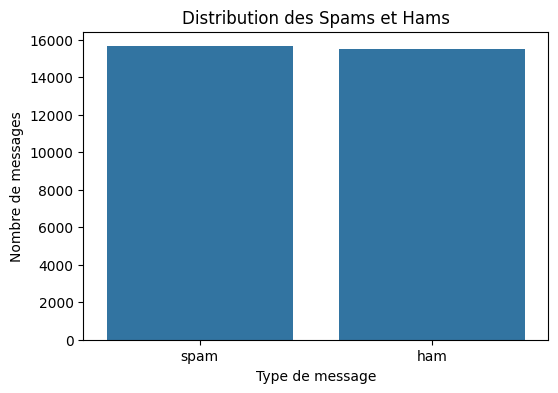

In [7]:
# Visualisation de la distribution de la variable cible 'label_text'
plt.figure(figsize=(6, 4))
sns.countplot(x='label_text', data=df)
plt.title('Distribution des Spams et Hams')
plt.xlabel('Type de message')
plt.ylabel('Nombre de messages')
plt.show()

Le graphique montre que notre jeu de donn√©es est parfaitement √©quilibr√© en termes de nombre d'emails de type "spam" et "ham". Il y a un nombre quasiment √©gal d'exemples dans chaque classe.

C'est une excellente nouvelle pour l'apprentissage automatique, car cela signifie que votre mod√®le ne sera pas biais√© en faveur de l'une des classes. Il n'est pas n√©cessaire d'appliquer des techniques de r√©√©chantillonnage comme l'oversampling ou l'undersampling pour corriger un d√©s√©quilibre de classes, ce qui simplifie le processus d'entra√Ænement.

**4. Cr√©er un nuage pour les mots fr√©quents dans les spams et un autre pour les emails l√©gitimes (ham).**

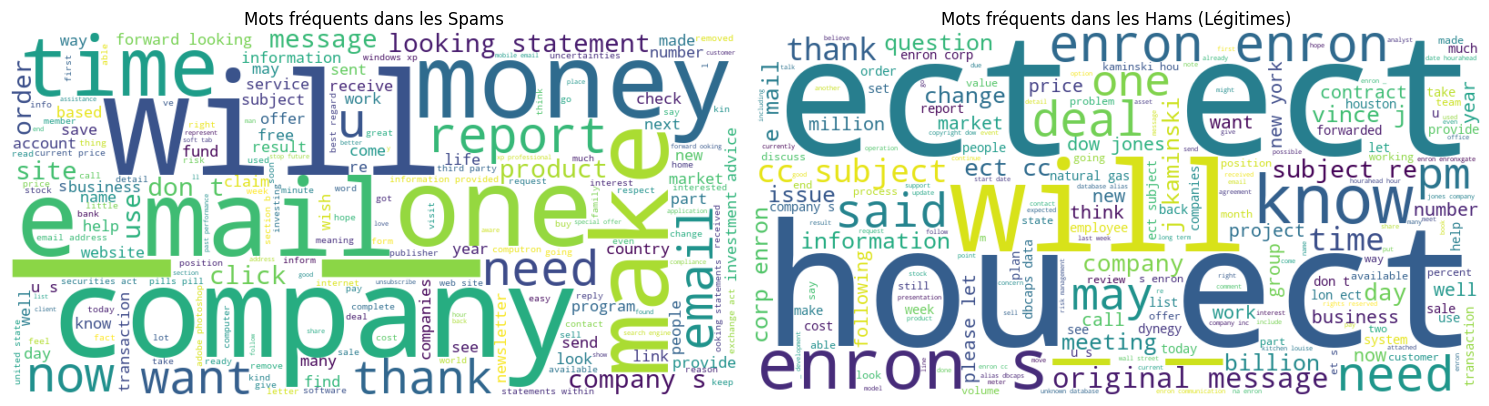

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# S√©parer les emails en deux cat√©gories
spam_emails = df[df['label_text'] == 'spam']['text']
ham_emails = df[df['label_text'] == 'ham']['text']

# Concat√©ner tout le texte pour chaque cat√©gorie
spam_text = ' '.join(spam_emails)
ham_text = ' '.join(ham_emails)

# Cr√©er un nuage de mots pour les spams
wordcloud_spam = WordCloud(width=800, height=400, background_color='white').generate(spam_text)

# Cr√©er un nuage de mots pour les hams
wordcloud_ham = WordCloud(width=800, height=400, background_color='white').generate(ham_text)

# Afficher les deux nuages de mots
plt.figure(figsize=(15, 7))

# Nuage de mots pour les Spams
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.title('Mots fr√©quents dans les Spams')
plt.axis('off')

# Nuage de mots pour les Hams
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.title('Mots fr√©quents dans les Hams (L√©gitimes)')
plt.axis('off')

plt.tight_layout()
plt.show()

Cr√©er des nuages de mots est une excellente fa√ßon de visualiser les termes les plus fr√©quents et d'obtenir une premi√®re intuition sur les diff√©rences linguistiques entre les spams et les emails l√©gitimes.

# Pr√©traitement du texte

**1. Convertir tout le texte en minuscules : text.lower().**

In [9]:
df['text'] = df['text'].str.lower()
print(df['text'].head(10))

0    any software just for 15 $ - 99 $ understandin...
1    perspective on ferc regulatory action client c...
2    wanted to try ci 4 lis but thought it was way ...
3    enron / hpl actuals for december 11 , 2000 tec...
4    looking for cheap high - quality software ? ro...
5    emerging growth stock profile vera ,\nvcsc - b...
6    internet provider abuse i noticed that you hav...
7    [ avfs ] romanian software production & export...
8    fortune most admired ranking congratulations !...
9    localized software , all languages available ....
Name: text, dtype: object


**2. Supprimer les doublons dans les donn√©es.**

In [10]:
nombre_doublons = df.duplicated().sum()
print(f"Nombre de doublons trouv√©s : {nombre_doublons}")

Nombre de doublons trouv√©s : 0


üìå on n'a pas de valeurs doublant a supprimer

**3. Identifier les valeurs manquantes et supprimer les lignes o√π la colonne text est vide ou manquante**

üìå d√©j√† fait avant

In [11]:
import pandas as pd
nombre_valeurs_manquantes = df['text'].isnull().sum()
print(f"Nombre de valeurs manquantes dans la colonne 'text' : {nombre_valeurs_manquantes}")

Nombre de valeurs manquantes dans la colonne 'text' : 0


# Appliquer la tokenisation : nltk.word_tokenize(text)

- Suppression de la ponctuation, caract√®res sp√©ciaux et chiffres
- Tokenisation
- Stemming
- Vectorisation avec TF-IDF

**4. Supprimer les stopwords (mots vides) avec nltk.corpus.stopwords.words('english').**

In [12]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))  # Obtenir la liste des stopwords en anglais

def remove_stopwords(text):
    tokens = word_tokenize(text) # Tokenisation du texte
    filtered_tokens = [word for word in tokens if word not in stop_words] # Filtrer les stopwords
    return " ".join(filtered_tokens) # Reconstruire la phrase

# Appliquer la fonction de suppression des stopwords √† la colonne 'text'
df['text'] = df['text'].apply(remove_stopwords)

# Afficher les premi√®res lignes pour v√©rifier le r√©sultat
print(df['text'].head())

0    software 15 $ - 99 $ understanding oem softwar...
1    perspective ferc regulatory action client conf...
2    wanted try ci 4 lis thought way expensive ? vi...
3    enron / hpl actuals december 11 , 2000 teco ta...
4    looking cheap high - quality software ? rotate...
Name: text, dtype: object


**5. Supprimer la ponctuation et les caract√®res sp√©ciaux √† l‚Äôaide de re.sub() ou string.punctuation.**

In [13]:
import re
import string

def remove_punctuation_and_digits(text):
    # Supprimer la ponctuation
    punctuation_to_remove = string.punctuation
    translator = str.maketrans('', '', punctuation_to_remove)
    text_no_punct = text.translate(translator)
    
    # Supprimer les chiffres (0-9)
    text_no_digits = re.sub(r'\d+', '', text_no_punct)
    
    return text_no_digits

# Appliquer la fonction √† la colonne 'text'
df['text'] = df['text'].apply(remove_punctuation_and_digits)

# Afficher les premi√®res lignes
print(df['text'].head())

0    software      understanding oem software lead ...
1    perspective ferc regulatory action client conf...
2    wanted try ci  lis thought way expensive  viag...
3    enron  hpl actuals december    teco tap     en...
4    looking cheap high  quality software  rotated ...
Name: text, dtype: object


**6. Appliquer le stemming avec PorterStemmer() de NLTK pour r√©duire les mots √† leur racine.**

In [14]:
import nltk
from nltk.tokenize import word_tokenize

def tokenize_text(text):    # Appliquer la tokenisation
    return word_tokenize(text)

df['tokens'] = df['text'].apply(tokenize_text)

# Affichez les premi√®res lignes pour v√©rifier que la colonne 'tokens' a bien √©t√© cr√©√©e
print(df[['text', 'tokens']].head())


                                                text  \
0  software      understanding oem software lead ...   
1  perspective ferc regulatory action client conf...   
2  wanted try ci  lis thought way expensive  viag...   
3  enron  hpl actuals december    teco tap     en...   
4  looking cheap high  quality software  rotated ...   

                                              tokens  
0  [software, understanding, oem, software, lead,...  
1  [perspective, ferc, regulatory, action, client...  
2  [wanted, try, ci, lis, thought, way, expensive...  
3  [enron, hpl, actuals, december, teco, tap, enr...  
4  [looking, cheap, high, quality, software, rota...  


# Extraction des caract√©ristiques

**1. Vectoriser le texte √† l‚Äôaide de TfidfVectorizer() ou CountVectorizer()**

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib
import pandas as pd
import os

# Cr√©ation du vecteur TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df['text'])

# Obtenir les noms des caract√©ristiques
feature_names = tfidf_vectorizer.get_feature_names_out()

# Convertir la matrice TF-IDF en DataFrame
tfidf_df = pd.DataFrame(X.toarray(), columns=feature_names)

# Afficher les informations
print(f"Forme de la matrice TF-IDF (Nombre d'emails, Nombre de caract√©ristiques) : {X.shape}")
print(f"Type de la matrice TF-IDF : {type(X)}")
print("Aper√ßu du DataFrame TF-IDF :")
print(tfidf_df.head())

# Sauvegarder le vectorizer
if not os.path.exists('models'):
    os.makedirs('models')

joblib.dump(tfidf_vectorizer, 'models/tfidf_vectorizer.pkl')
print("Vectorizer TF-IDF sauvegard√© sous 'models/tfidf_vectorizer.pkl'")

print("\n--- Vectorisation TF-IDF termin√©e ---")


Forme de la matrice TF-IDF (Nombre d'emails, Nombre de caract√©ristiques) : (31148, 5000)
Type de la matrice TF-IDF : <class 'scipy.sparse._csr.csr_matrix'>
Aper√ßu du DataFrame TF-IDF :
    aa   ab  abiiity  ability  able  abroad  absence  absolute  absolutely  \
0  0.0  0.0      0.0      0.0   0.0     0.0      0.0       0.0         0.0   
1  0.0  0.0      0.0      0.0   0.0     0.0      0.0       0.0         0.0   
2  0.0  0.0      0.0      0.0   0.0     0.0      0.0       0.0         0.0   
3  0.0  0.0      0.0      0.0   0.0     0.0      0.0       0.0         0.0   
4  0.0  0.0      0.0      0.0   0.0     0.0      0.0       0.0         0.0   

   abuse  ...  zealand  zero  zhiyong  zimbabwe  zimin  zip  zone  zonedubai  \
0    0.0  ...      0.0   0.0      0.0       0.0    0.0  0.0   0.0        0.0   
1    0.0  ...      0.0   0.0      0.0       0.0    0.0  0.0   0.0        0.0   
2    0.0  ...      0.0   0.0      0.0       0.0    0.0  0.0   0.0        0.0   
3    0.0  ...      0.0  

 --- Vectorisation du texte avec TfidfVectorizer ---

- Instancier le TfidfVectorizer
- On utilise max_features pour limiter le vocabulaire et rendre le mod√®le plus g√©rable

- Adapter (fit) le vectorizer aux donn√©es d'entra√Ænement et transformer le texte
- 'final_text_for_vectorization' est la colonne qui contient le texte nettoy√©, tokenis√© et stemm√©

- Sauvegarder le vectorizer entra√Æn√©
- Cr√©ez le dossier 'models' s'il n'existe pas

- **Term Frequency (TF)** : Il s'agit simplement du nombre de fois qu'un mot appara√Æt dans un email. Un mot qui appara√Æt fr√©quemment dans un document a une valeur TF √©lev√©e.

- **Inverse Document Frequency (IDF)** : Cette mesure √©value l'importance d'un mot dans l'ensemble du corpus d'emails. Un mot qui est tr√®s commun et appara√Æt dans de nombreux documents (comme "le", "la", "un", qui sont des stopwords) aura une valeur IDF faible, car il n'est pas tr√®s discriminant. √Ä l'inverse, un mot rare qui n'appara√Æt que dans un petit nombre d'emails (comme "urgent", "gagner" pour les spams) aura une valeur IDF √©lev√©e.

- **Le score TF-IDF** est le produit de ces deux valeurs (TF√óIDF). Cela a pour effet de donner un poids √©lev√© aux mots qui sont fr√©quents dans un email sp√©cifique mais rares dans l'ensemble du corpus. Par cons√©quent, les mots pertinents pour la classification, tels que "gratuit" dans un spam, recevront un poids plus important que des mots g√©n√©riques comme "bonjour" ou "email".

**2. D√©finir X √† partir des variables s√©lectionn√©es.**

In [16]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib
import os # Importez os si vous utilisez os.makedirs

# tfidf_vectorizer = joblib.load('models/tfidf_vectorizer.pkl') # Charge le vectorizer sauvegard√©
X = tfidf_vectorizer.transform(df['text']) # Transforme le texte avec le vectorizer charg√©
print("X (matrice TF-IDF) est d√©finie.")

# --- D√©finition de y (Variable Cible) ---
y = df['label_text']

print(f"\nForme de X (Caract√©ristiques) : {X.shape}")
print(f"Forme de y (Cible) : {y.shape}")
print(f"Les 20 premi√®res valeurs de y : \n{y.head(20)}")

X (matrice TF-IDF) est d√©finie.

Forme de X (Caract√©ristiques) : (31148, 5000)
Forme de y (Cible) : (31148,)
Les 20 premi√®res valeurs de y : 
0     spam
1      ham
2     spam
3      ham
4     spam
5     spam
6     spam
7     spam
8      ham
9     spam
10    spam
11    spam
12     ham
13     ham
14     ham
15     ham
16    spam
17    spam
18     ham
19     ham
Name: label_text, dtype: object


 --- D√©finition de X (Caract√©ristiques) ---
- X est la matrice TF-IDF r√©sultant de la vectorisation de votre texte pr√©trait√©.
- Cette partie suppose que tfidf_vectorizer a d√©j√† √©t√© instanci√© et fit_transform√©
- sur vos donn√©es, et potentiellement sauvegard√© et charg√© si vous travaillez dans une nouvelle session.
- y est la colonne qui contient les √©tiquettes 'spam' ou 'ham'.

**3. Diviser les donn√©es en ensemble d‚Äôentra√Ænement et de test √† l‚Äôaide de train_test_split.**

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# Afficher les formes des ensembles pour v√©rifier le split
print(f"Forme de X_train : {X_train.shape}")
print(f"Forme de X_test : {X_test.shape}")
print(f"Forme de y_train : {y_train.shape}")
print(f"Forme de y_test : {y_test.shape}")

# V√©rifier la distribution des classes dans les ensembles (optionnel mais recommand√© pour stratify)
print("\nDistribution des classes dans y_train:")
print(y_train.value_counts(normalize=True))
print("\nDistribution des classes dans y_test:")
print(y_test.value_counts(normalize=True))

Forme de X_train : (24918, 5000)
Forme de X_test : (6230, 5000)
Forme de y_train : (24918,)
Forme de y_test : (6230,)

Distribution des classes dans y_train:
label_text
spam    0.502288
ham     0.497712
Name: proportion, dtype: float64

Distribution des classes dans y_test:
label_text
spam    0.502247
ham     0.497753
Name: proportion, dtype: float64


# Entra√Ænement de plusieurs mod√®les de classification

1. Tester les algorithmes
2. √âvaluation des mod√®les 

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB # Souvent utilis√© pour les donn√©es textuelles (TF-IDF, Count)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


print("--- Entra√Ænement et test des algorithmes de classification ---")

# --- 1. Decision Tree Classifier ---
print("\n##### 1. Decision Tree Classifier #####")
# Instancier le mod√®le
dt_classifier = DecisionTreeClassifier(random_state=42)
# Entra√Æner le mod√®le
dt_classifier.fit(X_train, y_train)
# Faire des pr√©dictions sur l'ensemble de test
y_pred_dt = dt_classifier.predict(X_test)
# √âvaluer le mod√®le (Pr√©cision)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Pr√©cision du Decision Tree Classifier : {accuracy_dt:.4f}")



# --- 2. Na√Øve Bayes Classifier (MultinomialNB) ---
print("\n##### 2. Na√Øve Bayes Classifier (MultinomialNB) #####")
# Instancier le mod√®le
# MultinomialNB est bien adapt√© aux caract√©ristiques de comptage/fr√©quence comme TF-IDF
nb_classifier = MultinomialNB()
# Entra√Æner le mod√®le
nb_classifier.fit(X_train, y_train)
# Faire des pr√©dictions sur l'ensemble de test
y_pred_nb = nb_classifier.predict(X_test)
# √âvaluer le mod√®le (Pr√©cision)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Pr√©cision du Na√Øve Bayes Classifier : {accuracy_nb:.4f}")



# --- 3. Support Vector Classifier (SVC) ---
print("\n##### 3. Support Vector Classifier (SVC) #####")
# Instancier le mod√®le
# SVC peut prendre plus de temps √† entra√Æner sur de grands jeux de donn√©es textuels
# Pour un premier test rapide, vous pouvez utiliser un noyau lin√©aire qui est souvent efficace pour le texte
svc_classifier = SVC(kernel='linear', random_state=42)
# Entra√Æner le mod√®le
svc_classifier.fit(X_train, y_train)
# Faire des pr√©dictions sur l'ensemble de test
y_pred_svc = svc_classifier.predict(X_test)
# √âvaluer le mod√®le (Pr√©cision)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"Pr√©cision du Support Vector Classifier : {accuracy_svc:.4f}")

print("\n--- Test des algorithmes termin√© ---")

# Stocker les pr√©cisions pour une comparaison facile (optionnel)
accuracies = {
    "Decision Tree": accuracy_dt,
    "Na√Øve Bayes (Multinomial)": accuracy_nb,
    "SVC (Linear)": accuracy_svc
}

print("\nR√©capitulatif des pr√©cisions :")
for model_name, accuracy in accuracies.items():
    print(f"- {model_name}: {accuracy:.4f}")

--- Entra√Ænement et test des algorithmes de classification ---

##### 1. Decision Tree Classifier #####
Pr√©cision du Decision Tree Classifier : 0.9547

##### 2. Na√Øve Bayes Classifier (MultinomialNB) #####
Pr√©cision du Na√Øve Bayes Classifier : 0.9831

##### 3. Support Vector Classifier (SVC) #####
Pr√©cision du Support Vector Classifier : 0.9891

--- Test des algorithmes termin√© ---

R√©capitulatif des pr√©cisions :
- Decision Tree: 0.9547
- Na√Øve Bayes (Multinomial): 0.9831
- SVC (Linear): 0.9891


# S√©lection et sauvegarde du meilleur mod√®le

1. Validation crois√©e

In [19]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

print("--- Validation Crois√©e des Algorithmes avec Multiples M√©triques ---")

# D√©finir le nombre de folds pour la validation crois√©e
n_splits = 5 

# Configurer la validation crois√©e stratifi√©e
cv_strategy = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Liste des mod√®les √† tester
models = {
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "Na√Øve Bayes Classifier (MultinomialNB)": MultinomialNB(),
    "Support Vector Classifier (SVC Linear)": SVC(kernel='linear', random_state=42, probability=True) # SVC : probability=True est n√©cessaire pour le scoring 'roc_auc'
}

# D√©finir les m√©triques d'√©valuation √† calculer
scoring_metrics = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']

# Dictionnaire pour stocker les r√©sultats d√©taill√©s de la validation crois√©e
cv_results_detailed = {}

for name, model in models.items():
    print(f"\n##### Validation Crois√©e pour : {name} #####")
    
    # Dictionnaire pour stocker les scores pour ce mod√®le et toutes les m√©triques
    model_scores = {}
    
    for metric in scoring_metrics:
        try:
            # cross_val_score calcule le score pour chaque fold
            scores = cross_val_score(model, X, y, cv=cv_strategy, scoring=metric)
            
            model_scores[metric] = {
                "scores": scores,
                "mean": scores.mean(),
                "std": scores.std()
            }
            print(f"  {metric.replace('_weighted', '').capitalize()} - Moyenne: {scores.mean():.4f} (√âcart-type: {scores.std():.4f})")
            
        except ValueError as e:
            print(f"  Erreur lors du calcul de {metric}: {e}")
            print(f"  Cela peut √™tre d√ª √† des labels non binaires ou √† des probl√®mes internes de scoring.")
            print(f"  Pour {metric}, assurez-vous que vos labels 'y' sont encod√©s en 0 et 1, ou utilisez un 'scoring' appropri√© (ex: 'f1_weighted').")

    cv_results_detailed[name] = model_scores

print("\n--- Validation Crois√©e compl√®te termin√©e ---")

print("\n### R√©capitulatif D√©taill√© des R√©sultats de Validation Crois√©e ###")
for model_name, metrics_data in cv_results_detailed.items():
    print(f"\nMod√®le: {model_name}")
    for metric, data in metrics_data.items():
        print(f"  {metric.replace('_weighted', '').capitalize()}: Moyenne = {data['mean']:.4f}, √âcart-type = {data['std']:.4f}")

--- Validation Crois√©e des Algorithmes avec Multiples M√©triques ---

##### Validation Crois√©e pour : Decision Tree Classifier #####
  Accuracy - Moyenne: 0.9612 (√âcart-type: 0.0018)
  Precision - Moyenne: 0.9613 (√âcart-type: 0.0018)
  Recall - Moyenne: 0.9612 (√âcart-type: 0.0018)
  F1 - Moyenne: 0.9612 (√âcart-type: 0.0018)
  Roc_auc - Moyenne: 0.9630 (√âcart-type: 0.0017)

##### Validation Crois√©e pour : Na√Øve Bayes Classifier (MultinomialNB) #####
  Accuracy - Moyenne: 0.9821 (√âcart-type: 0.0018)
  Precision - Moyenne: 0.9822 (√âcart-type: 0.0018)
  Recall - Moyenne: 0.9821 (√âcart-type: 0.0018)
  F1 - Moyenne: 0.9821 (√âcart-type: 0.0018)
  Roc_auc - Moyenne: 0.9977 (√âcart-type: 0.0002)

##### Validation Crois√©e pour : Support Vector Classifier (SVC Linear) #####
  Accuracy - Moyenne: 0.9889 (√âcart-type: 0.0008)
  Precision - Moyenne: 0.9889 (√âcart-type: 0.0008)
  Recall - Moyenne: 0.9889 (√âcart-type: 0.0008)
  F1 - Moyenne: 0.9889 (√âcart-type: 0.0008)
  Roc_auc - Moy

# MLflow

In [ ]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib
import os
import mlflow
import mlflow.sklearn

# --- D√©finir les param√®tres pour le suivi MLflow ---
MAX_FEATURES = 10000
TEST_SIZE = 0.20
RANDOM_STATE = 42
MODEL_NAME = "MultinomialNB"
MODEL_ALPHA = 1.0 # Hyperparam√®tre alpha pour Naive Bayes

# ==============================================================================
# D√âBUT DE L'EXP√âRIMENTATION AVEC MLFLOW
# ==============================================================================

# MLflow: D√©marre une nouvelle "run" (ex√©cution) pour l'exp√©rimentation.
with mlflow.start_run():
    print("\n### √âTAPE 2: Vectorisation et division des donn√©es ###")

    X_text = df['final_text_for_vectorization']
    y = df['label_text']

    tfidf_vectorizer = TfidfVectorizer(max_features=MAX_FEATURES)
    X = tfidf_vectorizer.fit_transform(X_text)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y
    )
    
    # MLflow: Enregistrer les param√®tres cl√©s de l'ex√©cution
    mlflow.log_param("model_name", MODEL_NAME)
    mlflow.log_param("max_features", MAX_FEATURES)
    mlflow.log_param("test_size", TEST_SIZE)
    mlflow.log_param("random_state", RANDOM_STATE)
    mlflow.log_param("model_alpha", MODEL_ALPHA)
    
    print("\n### √âTAPE 3: Entra√Ænement et √©valuation du mod√®le ###")

    # Instancier le mod√®le avec l'hyperparam√®tre
    model = MultinomialNB(alpha=MODEL_ALPHA)

    # Entra√Æner le mod√®le
    model.fit(X_train, y_train)

    # Faire des pr√©dictions
    y_pred = model.predict(X_test)

    # Calculer les m√©triques
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='spam')
    recall = recall_score(y_test, y_pred, pos_label='spam')
    f1 = f1_score(y_test, y_pred, pos_label='spam')
    
    # MLflow: Enregistrer les m√©triques d'√©valuation
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)

    print(f"\nPr√©cision du mod√®le sur l'ensemble de test : {accuracy:.4f}")
    print(f"Precision du mod√®le: {precision:.4f}")
    print(f"Rappel du mod√®le: {recall:.4f}")
    print(f"F1-Score du mod√®le: {f1:.4f}")
    print("\nRapport de classification :\n", classification_report(y_test, y_pred))

    # MLflow: Enregistrer le mod√®le et le vectorizer comme artefacts
    mlflow.sklearn.log_model(model, "spam_detection_model")
    
    # MLflow: Enregistrer le vectorizer s√©par√©ment comme un artefact
    # Cr√©e un dossier temporaire pour l'artefact
    if not os.path.exists('artifacts'):
        os.makedirs('artifacts')
    joblib.dump(tfidf_vectorizer, "artifacts/tfidf_vectorizer.pkl")
    mlflow.log_artifact("artifacts/tfidf_vectorizer.pkl", "vectorizers")
    
    # Sauvegarder aussi le mod√®le avec joblib si n√©cessaire pour l'acc√®s direct
    if not os.path.exists('models'):
        os.makedirs('models')
    joblib.dump(model, 'models/spam_detector_model.pkl')
    print("Mod√®le de d√©tection de spam sauvegard√© avec joblib.")

print("\n--- Ex√©cution de l'exp√©rimentation MLflow termin√©e ---")

2. Optimisation des hyperparam√®tres

In [20]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
import pandas as pd


print("--- D√©but de l'Optimisation des Hyperparam√®tres ---")

# D√©finir la strat√©gie de validation crois√©e (stratifi√©e pour les classes d√©s√©quilibr√©es)
# GridSearchCV utilisera cette strat√©gie en interne.
cv_strategy_grid = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# --- √âtape 2 : Optimisation pour Multinomial Na√Øve Bayes ---
print("\n##### Optimisation pour Multinomial Na√Øve Bayes #####")

# D√©finir la grille des hyperparam√®tres √† tester
param_grid_nb = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0] # Param√®tre de lissage de Laplace
}

# Instancier le mod√®le
nb_model = MultinomialNB()

# Instancier GridSearchCV pour Naive Bayes
grid_search_nb = GridSearchCV(
    estimator=nb_model,
    param_grid=param_grid_nb,
    cv=cv_strategy_grid,
    scoring='f1_weighted', # La m√©trique √† optimiser (f1_weighted est un bon choix pour les d√©s√©quilibres)
    n_jobs=-1,             # Utilise tous les c≈ìurs de processeur
    verbose=1              # Affiche les progr√®s
)

# Ex√©cuter la recherche sur grille
grid_search_nb.fit(X, y)

print(f"Meilleurs hyperparam√®tres pour Na√Øve Bayes : {grid_search_nb.best_params_}")
print(f"Meilleur score F1 (pond√©r√©) pour Na√Øve Bayes : {grid_search_nb.best_score_:.4f}")


# --- √âtape 3 : Optimisation pour Support Vector Classifier (SVC) ---
print("\n##### Optimisation pour Support Vector Classifier (SVC) #####")

# D√©finir la grille des hyperparam√®tres √† tester
# On teste diff√©rentes valeurs pour C, le param√®tre de r√©gularisation
param_grid_svc = {
    'C': [0.1, 1, 10],     # Le compromis entre une marge large et une classification correcte
    'kernel': ['linear']   # Nous nous concentrons sur le noyau lin√©aire, souvent efficace pour le texte
}

# Instancier le mod√®le SVC
# probability=True est ajout√© si vous pr√©voyez d'√©valuer la m√©trique 'roc_auc'
svc_model = SVC(random_state=42, probability=True)

# Instancier GridSearchCV pour SVC
grid_search_svc = GridSearchCV(
    estimator=svc_model,
    param_grid=param_grid_svc,
    cv=cv_strategy_grid,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)

# Ex√©cuter la recherche sur grille
grid_search_svc.fit(X, y)

print(f"Meilleurs hyperparam√®tres pour SVC : {grid_search_svc.best_params_}")
print(f"Meilleur score F1 (pond√©r√©) pour SVC : {grid_search_svc.best_score_:.4f}")

# --- Conclusion de l'optimisation ---
print("\n--- Optimisation des hyperparam√®tres termin√©e ---")
best_models = {
    "Na√Øve Bayes": grid_search_nb.best_estimator_,
    "SVC": grid_search_svc.best_estimator_
}
print("\nLes meilleurs mod√®les entra√Æn√©s avec leurs hyperparam√®tres optimaux sont maintenant disponibles.")

--- D√©but de l'Optimisation des Hyperparam√®tres ---

##### Optimisation pour Multinomial Na√Øve Bayes #####
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Meilleurs hyperparam√®tres pour Na√Øve Bayes : {'alpha': 0.01}
Meilleur score F1 (pond√©r√©) pour Na√Øve Bayes : 0.9826

##### Optimisation pour Support Vector Classifier (SVC) #####
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Meilleurs hyperparam√®tres pour SVC : {'C': 1, 'kernel': 'linear'}
Meilleur score F1 (pond√©r√©) pour SVC : 0.9889

--- Optimisation des hyperparam√®tres termin√©e ---

Les meilleurs mod√®les entra√Æn√©s avec leurs hyperparam√®tres optimaux sont maintenant disponibles.


Comparer les scores des mod√®les optimis√©s

In [21]:
print("--- Comparaison des scores des mod√®les optimis√©s ---")

nb_best_score = grid_search_nb.best_score_
svc_best_score = grid_search_svc.best_score_

print(f"Meilleur score pour Na√Øve Bayes : {nb_best_score:.4f}")
print(f"Meilleur score pour SVC : {svc_best_score:.4f}")

# S√©lectionner le meilleur mod√®le en fonction du score F1 pond√©r√©
if nb_best_score > svc_best_score:
    print(f"\nLe mod√®le le plus performant est Na√Øve Bayes.")
    best_model = grid_search_nb.best_estimator_
else:
    print(f"\nLe mod√®le le plus performant est SVC.")
    best_model = grid_search_svc.best_estimator_

# Afficher les hyperparam√®tres optimaux du meilleur mod√®le
print(f"Ses meilleurs hyperparam√®tres sont : {best_model.get_params()}")

--- Comparaison des scores des mod√®les optimis√©s ---
Meilleur score pour Na√Øve Bayes : 0.9826
Meilleur score pour SVC : 0.9889

Le mod√®le le plus performant est SVC.
Ses meilleurs hyperparam√®tres sont : {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': True, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}


3. S√©lection et sauvegarde du meilleur mod√®le

In [22]:
import joblib
import os
from sklearn.preprocessing import LabelEncoder 

# Cr√©er le dossier 'models' s'il n'existe pas
if not os.path.exists('models'):
    os.makedirs('models')

# Sauvegarder le meilleur mod√®le entra√Æn√©
joblib.dump(best_model, 'models/best_spam_detector.pkl')
print("\nLe meilleur mod√®le a √©t√© sauvegard√© sous 'models/best_spam_detector.pkl'")

# Sauvegarder le vectorizer entra√Æn√©
joblib.dump(tfidf_vectorizer, 'models/tfidf_vectorizer.pkl')
print("Le vectorizer TF-IDF a √©t√© sauvegard√© sous 'models/tfidf_vectorizer.pkl'")

print("\n--- Processus termin√©. Le meilleur mod√®le est pr√™t √† √™tre utilis√© ---")


Le meilleur mod√®le a √©t√© sauvegard√© sous 'models/best_spam_detector.pkl'
Le vectorizer TF-IDF a √©t√© sauvegard√© sous 'models/tfidf_vectorizer.pkl'

--- Processus termin√©. Le meilleur mod√®le est pr√™t √† √™tre utilis√© ---
